In [511]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [512]:


# A class for LIF , NLIF and ALIF Model.

class LIF:
    
    
    # this function will initialize model.
    
    def __init__(self , dt = 0.1 , uRest=-70,uReset = -65, R=10, tau=8, treshold=-50, uSpike = 10 , duration=100 , uStart = -85 ,
        isNLIF = False , thetaRH = -55 , dtSharpness = 0.8 ,
        isALIF = False , tauK = 1  , currentModel = 1 , aValue = 0.02 , bValue = 0.4 ,
        numOfTest = 500 , maxCurrent = 5  , freqCount = 1):
        
        self.dt = dt
        self.uRest = uRest
        self.uReset = uReset
        self.R = R
        self.tau = tau
        self.tauK = tauK
        self.treshold = treshold
        self.duration = duration
        self.uSpike = uSpike
        self.uStart = uStart
        self.spike = []
        self.time = []
        self.current = []
        self.u = []
        self.w = []
        self.wTemp = 0
        self.thetaRH = thetaRH
        self.exponentialValue = 0
        self.adaptiveValue = 0
        self.isNLIF = isNLIF
        self.isALIF = isALIF
        self.dtSharpness = dtSharpness
        self.fireCount = 0
        self.currentModel = currentModel
        self.aValue = aValue
        self.bValue = bValue
        
        self.numOfTest = numOfTest
        self.maxCurrent = maxCurrent
        self.freqCount = freqCount
        
        
        # initialize time array
        for i in range(0, int(duration/dt), 1):
            self.time.append(i * dt)
        self.u.append(uStart) 
        self.w.append(0)
   
        
    
        
    # this function will be used for making a list of currents
    def currentFunc(self):
            
           # fixed current
            if(self.currentModel == 1):
                for i in range(len(self.time)):
                    self.current.append(4)
            # linear current        
            elif (self.currentModel == 2):
                for i in range(len(self.time)):
                    self.current.append(i/2)
            # sin current 
            elif (self.currentModel == 3):
                for i in range(len(self.time)):
                    self.current.append(math.sin(i)+2)
            # power 2 current 
            elif (self.currentModel == 4):
                for i in range(len(self.time)):
                    self.current.append((pow(i-100,2)+2)/2000)
            # random current between 1 and 6
            elif (self.currentModel == 5):
                for i in range(len(self.time)):
                    self.current.append(random.randrange(1, 6))
            # random current be
            elif (self.currentModel == 6):
                for i in range(len(self.time)):
                    if(i % 2 == 0):
                        self.current.append(0)
                    else:
                        self.current.append(1)
                    
            # current for frequency
            if(self.currentModel == 7):
                for i in range(len(self.time)):
                    self.current.append(self.freqCount * self.maxCurrent / self.numOfTest)
        
    

  

    # potential function to find potential base on current 
    def potential(self):
            
          
                
            temp = self.uStart     #temp value for latest u
            for i in range(0, len(self.time)):
                self.exponentialValue = 0
                
                
                #if the model is exponential
                if (self.isNLIF == True):
                    self.exponentialValue =(self.dtSharpness * math.exp((temp - self.thetaRH)/self.dtSharpness))
                
                # if the model adaptive
                if (self.isALIF == True):
                    dw = ((((self.aValue*(temp-self.uRest))-self.wTemp) / self.tauK) + (self.bValue * self.fireCount))
                    self.wTemp = (dw * self.dt) + self.wTemp  #latar should be multiply by R
                    
                    
                    
                #start calculating du    
                du = ( (-1*(temp-self.uRest)) + (self.R * self.current[i]) + self.exponentialValue - (self.R * self.wTemp)) 
                du = (du* self.dt)/ self.tau
                temp = du + temp
                
                #if passes treshold
                if temp >= self.treshold:
                    self.u.append(self.uSpike+temp)
                    self.u.append(self.uReset)
                    self.fireCount += 1
                    #i += 1
                
                    self.spike.append(self.time[i])
                    temp = self.uReset
                else:
                    self.u.append(temp) 
                    
                self.w.append(self.wTemp)
                          
                     
                
                
    def uTimePlot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.u)))), self.u,'blue')
        
        plt.xlabel("time")
        plt.ylabel("potential")
        if (self.isALIF == True):
            plt.figtext(1.2, 0.2, f"Total time frame: {self.duration} \n dt: {self.dt} \n Rm: {self.R} \n tau: {self.tau} \n treshold: {self.treshold} \n vRest: {self.uRest} \n Vreset:{self.uReset} \n Vspike: {self.uSpike} \n Vstart: {self.uStart} \n Vrh: {self.thetaRH} \n a: {self.aValue} \n b: {self.bValue} \n dtSharpness: {self.dtSharpness}", ha="right", fontsize=10)
        else:
            plt.figtext(1.2, 0.2, f"Total time frame: {self.duration} \n dt: {self.dt} \n Rm: {self.R} \n tau: {self.tau} \n treshold: {self.treshold} \n vRest: {self.uRest} \n Vreset:{self.uReset} \n Vspike: {self.uSpike} \n Vstart: {self.uStart} \n", ha="right", fontsize=12)
        plt.show()
        
        
    def wTimePlot(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.w)))), self.w,'cyan')
        plt.xlabel("time")
        plt.ylabel("adaptation current")
        plt.show()    
        

    
    def plotCurrent(self):
        plt.plot(list(map(lambda i: i * self.dt, range(len(self.current)))), self.current,'red')
        plt.xlabel("time")
        plt.ylabel("input current")
        plt.show()
        


In [513]:
def frequency():
        numOfTest = 100
        maxCurrent = 10
        freq = []
        for i in range(numOfTest):
            x = LIF(duration = 100, dt = 0.2, currentModel = 7 , numOfTest = numOfTest , maxCurrent = maxCurrent ,freqCount = i)
            x.currentFunc()
            x.potential()

            if (len(x.spike) > 1):
                freq.append(1 / (x.spike[1] - x.spike[0]))
            elif (len(x.spike) == 1):
                freq.append(1 / x.time[-1])
            else:
                freq.append(0)
    
        plt.plot(np.arange(0, maxCurrent, maxCurrent/numOfTest), freq,'yellow')
        plt.xlabel("input current")
        plt.ylabel("frequency")
        plt.show()

# LIF

# const current

In [514]:
lif1 = LIF(duration = 100 , dt = 0.5 , currentModel = 1 )
lif1.currentFunc()
lif1.potential()


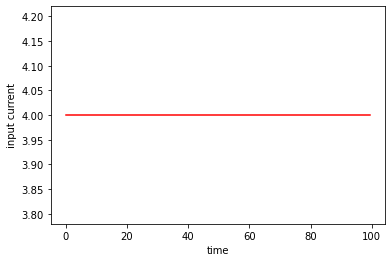

In [515]:
lif1.plotCurrent()

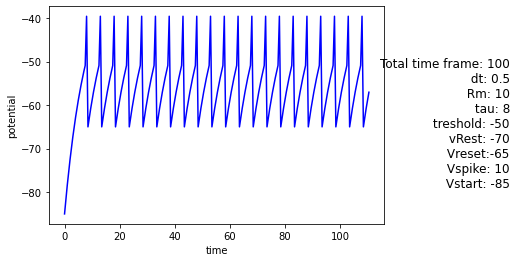

In [516]:
lif1.uTimePlot()

# linear

In [517]:
lif2 = LIF(duration = 100 , dt = 1 , currentModel = 2 )
lif2.currentFunc()
lif2.potential()

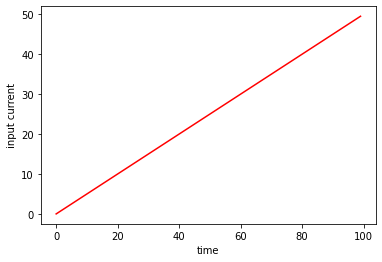

In [518]:
lif2.plotCurrent()

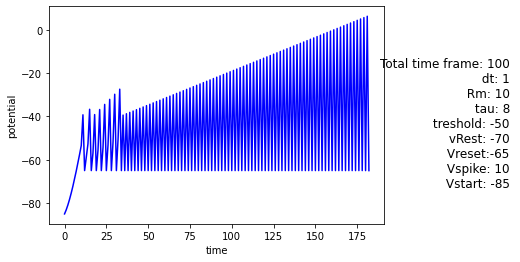

In [519]:
lif2.uTimePlot()

# sin current

In [520]:
lif3 = LIF(duration = 150 , dt = 1 , currentModel = 3 )
lif3.currentFunc()
lif3.potential()

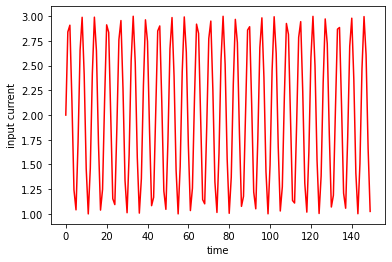

In [521]:
lif3.plotCurrent()

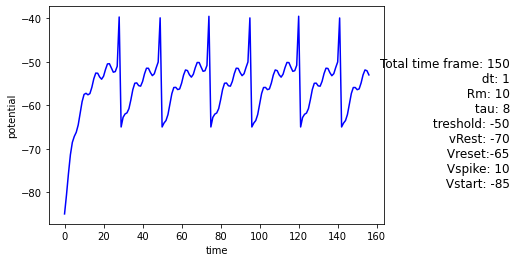

In [522]:
lif3.uTimePlot()

# (x-100)^2+2 current

In [523]:
lif4 = LIF(duration = 200 , dt = 1 , currentModel = 4 )
lif4.currentFunc()
lif4.potential()

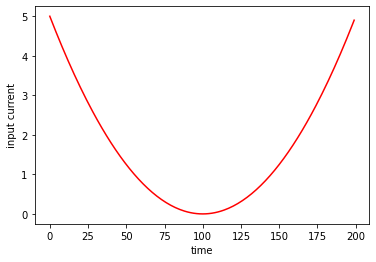

In [524]:
lif4.plotCurrent()

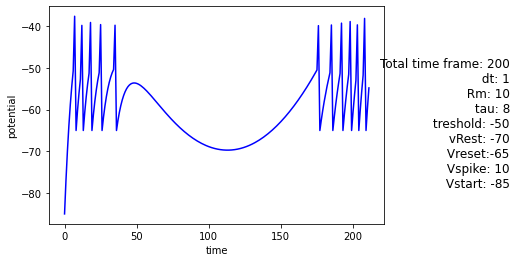

In [525]:
lif4.uTimePlot()

# random current

In [526]:
lif5 = LIF(duration = 200 , dt = 1 , currentModel = 5 )
lif5.currentFunc()
lif5.potential()

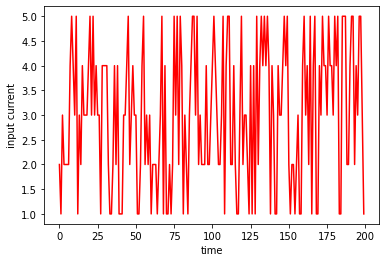

In [527]:
lif5.plotCurrent()

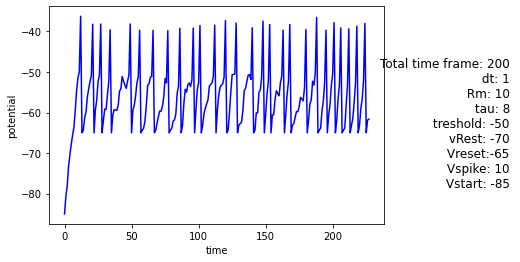

In [528]:
lif5.uTimePlot()

# 0 and 1 current

In [529]:
lif6 = LIF(duration = 100 , dt = 1 , currentModel = 6 )
lif6.currentFunc()
lif6.potential()

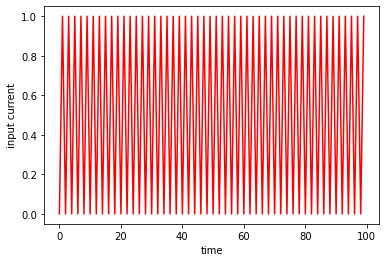

In [530]:
lif6.plotCurrent()

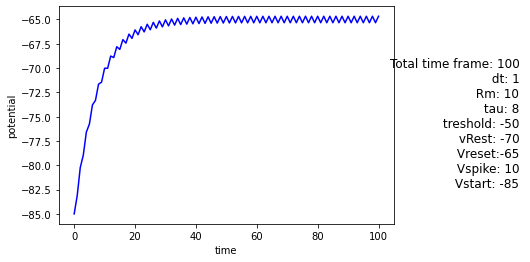

In [531]:
lif6.uTimePlot()

# FI

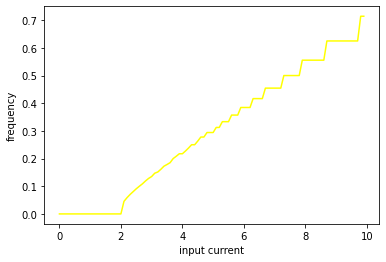

In [532]:
frequency()

# NLIF

# const crrunt

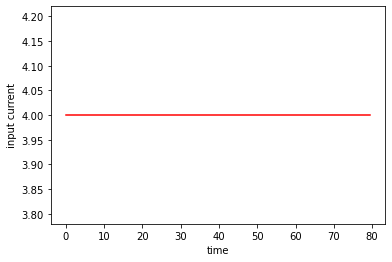

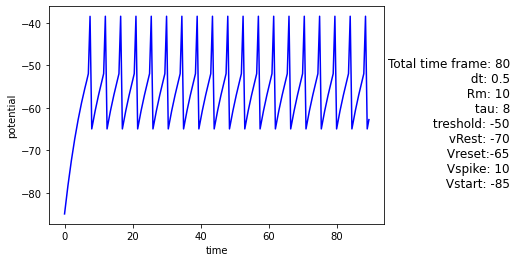

In [533]:
Nlif1 = LIF(duration = 80 , dt = 0.5 , currentModel = 1 , isNLIF = True)
Nlif1.currentFunc()
Nlif1.potential()
Nlif1.plotCurrent()
Nlif1.uTimePlot()

# linear current

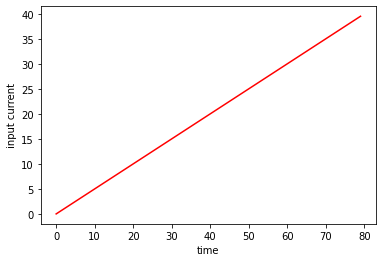

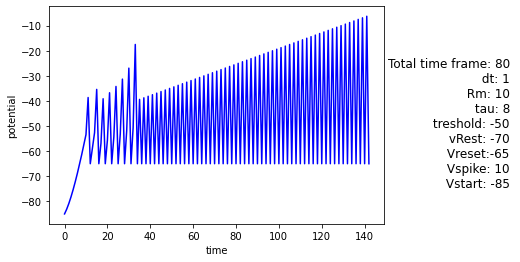

In [534]:
Nlif2 = LIF(duration = 80 , dt = 1 , currentModel = 2 , isNLIF = True ,dtSharpness=1)
Nlif2.currentFunc()
Nlif2.potential()
Nlif2.plotCurrent()
Nlif2.uTimePlot()

# sin current

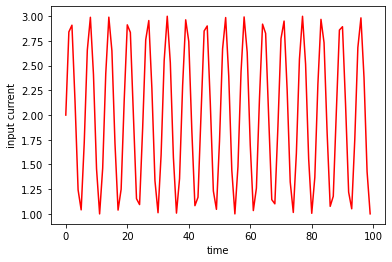

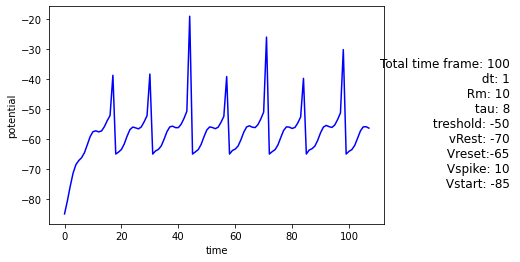

In [535]:
Nlif3 = LIF(duration = 100 , dt = 1 , currentModel = 3 , isNLIF = True)
Nlif3.currentFunc()
Nlif3.potential()
Nlif3.plotCurrent()
Nlif3.uTimePlot()

# (x-100)^2-2

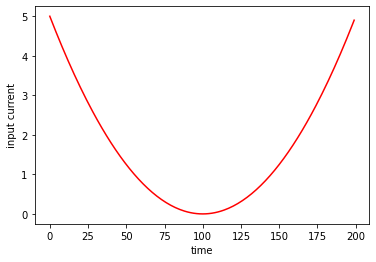

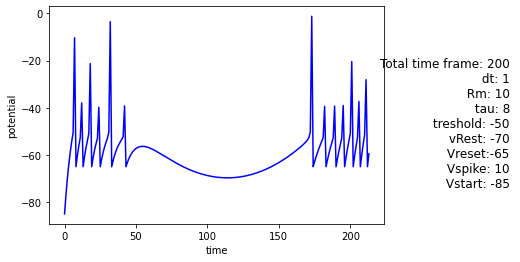

In [536]:
Nlif4 = LIF(duration = 200 , dt = 1 , currentModel = 4 , isNLIF = True)
Nlif4.currentFunc()
Nlif4.potential()
Nlif4.plotCurrent()
Nlif4.uTimePlot()

# random

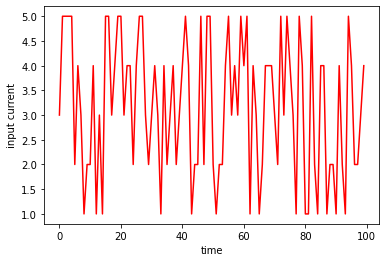

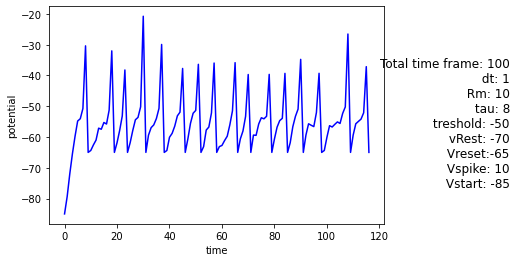

In [537]:
Nlif5 = LIF(duration = 100 , dt = 1 , currentModel = 5 , isNLIF = True,dtSharpness =1)
Nlif5.currentFunc()
Nlif5.potential()
Nlif5.plotCurrent()
Nlif5.uTimePlot()

# 0 or 1 current

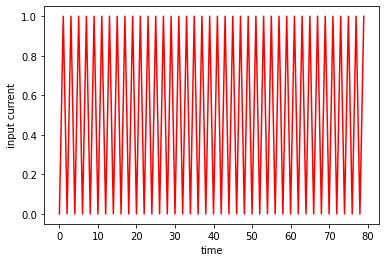

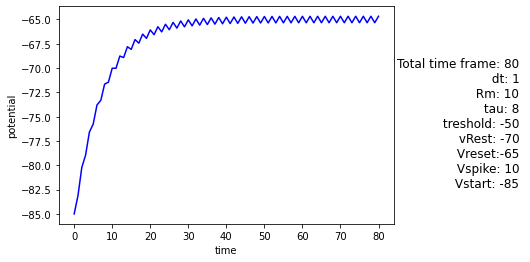

In [538]:
Nlif6 = LIF(duration = 80 , dt = 1 , currentModel = 6 , isNLIF = True)
Nlif6.currentFunc()
Nlif6.potential()
Nlif6.plotCurrent()
Nlif6.uTimePlot()

# FI of NLIF

In [539]:
def frequency2():
        numOfTest = 100
        maxCurrent = 10
        freq = []
        for i in range(numOfTest):
            x = LIF(duration = 100, dt = 0.2, currentModel = 7 , numOfTest = numOfTest , maxCurrent = maxCurrent ,freqCount = i , isNLIF =True)
            x.currentFunc()
            x.potential()

            if (len(x.spike) > 1):
                freq.append(1 / (x.spike[1] - x.spike[0]))
            elif (len(x.spike) == 1):
                freq.append(1 / x.time[-1])
            else:
                freq.append(0)
    
        plt.plot(np.arange(0, maxCurrent, maxCurrent/numOfTest), freq,'yellow')
        plt.xlabel("input current")
        plt.ylabel("frequency")
        plt.show()

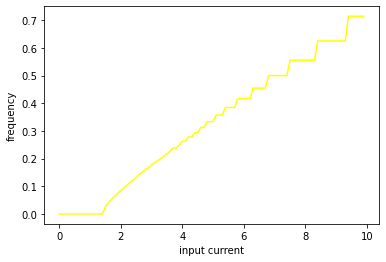

In [540]:
frequency2()

# ALIF

# const current

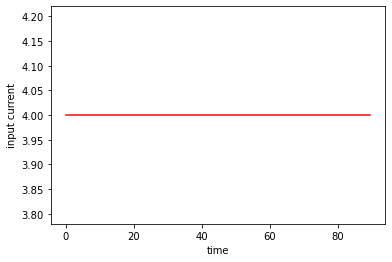

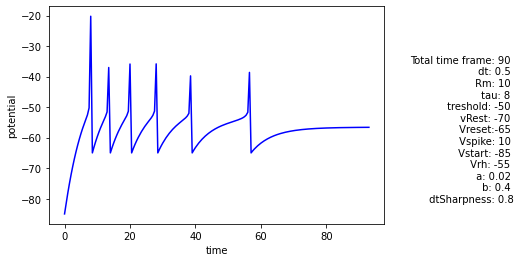

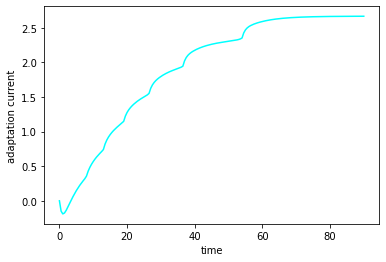

In [541]:
Alif1 = LIF(duration = 90 , dt = 0.5 , currentModel = 1 , isNLIF = True , isALIF = True)
Alif1.currentFunc()
Alif1.potential()
Alif1.plotCurrent()
Alif1.uTimePlot()
Alif1.wTimePlot()

# linear current

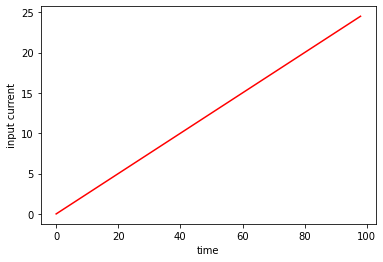

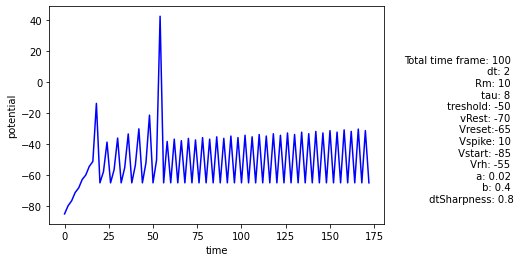

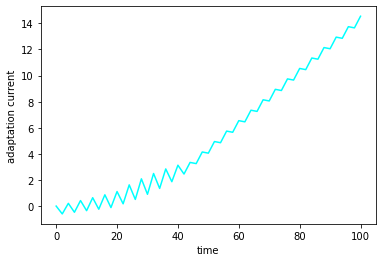

In [542]:
Alif2 = LIF(duration = 100 , dt = 2 , currentModel = 2 , isNLIF = True , isALIF = True)
Alif2.currentFunc()
Alif2.potential()
Alif2.plotCurrent()
Alif2.uTimePlot()
Alif2.wTimePlot()

# sin current

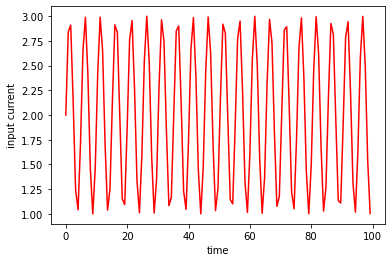

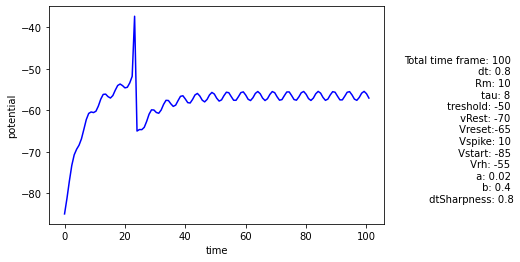

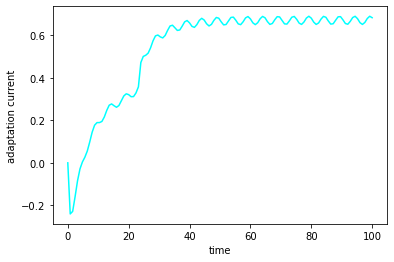

In [543]:
Alif3 = LIF(duration = 100 , dt = 0.8 , currentModel = 3 , isNLIF = True , isALIF = True)
Alif3.currentFunc()
Alif3.potential()
Alif3.plotCurrent()
Alif3.uTimePlot()
Alif3.wTimePlot()

# (x-100)^2+2 current

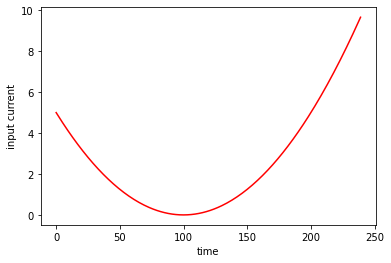

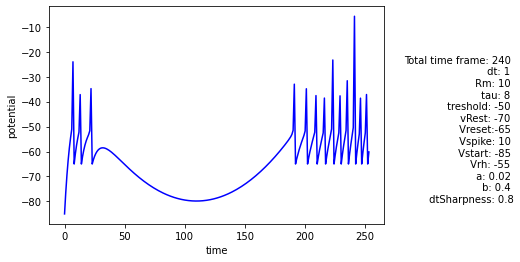

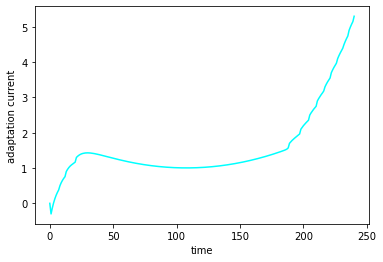

In [544]:
Alif4 = LIF(duration = 240 , dt = 1 , currentModel = 4 , isNLIF = True , isALIF = True)
Alif4.currentFunc()
Alif4.potential()
Alif4.plotCurrent()
Alif4.uTimePlot()
Alif4.wTimePlot()

# Random current

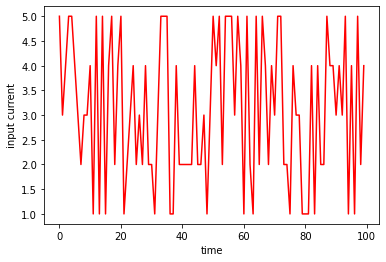

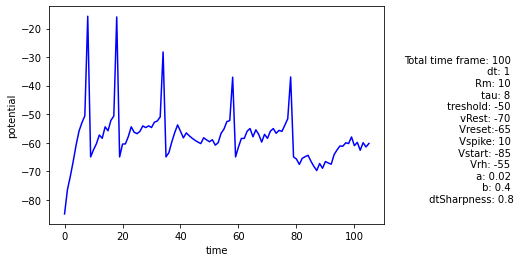

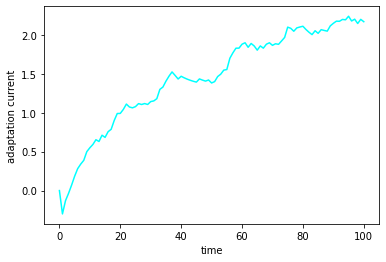

In [545]:
Alif5 = LIF(duration = 100 , dt = 1 , currentModel = 5 , isNLIF = True , isALIF = True)
Alif5.currentFunc()
Alif5.potential()
Alif5.plotCurrent()
Alif5.uTimePlot()
Alif5.wTimePlot()

# 0 and 1 current

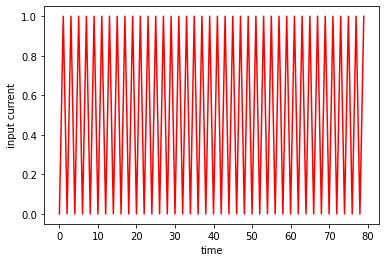

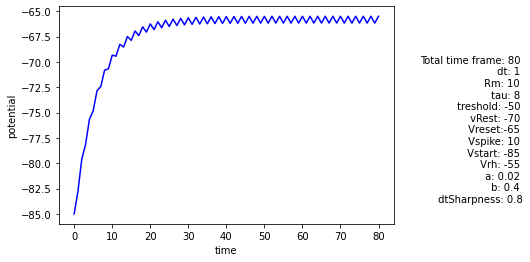

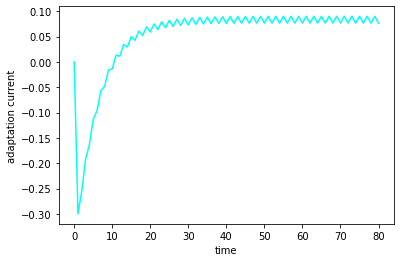

In [546]:
Alif6 = LIF(duration = 80 , dt = 1 , currentModel = 6 , isNLIF = True , isALIF = True)
Alif6.currentFunc()
Alif6.potential()
Alif6.plotCurrent()
Alif6.uTimePlot()
Alif6.wTimePlot()

# FI for ALIF

In [547]:
def frequency3():
        numOfTest = 100
        maxCurrent = 10
        freq = []
        for i in range(numOfTest):
            x = LIF(duration = 100, dt = 0.1, currentModel = 7 , numOfTest = numOfTest , maxCurrent = maxCurrent ,freqCount = i , isNLIF =True, isALIF =True)
            x.currentFunc()
            x.potential()

            if (len(x.spike) > 1):
                freq.append(1 / (x.spike[1] - x.spike[0]))
            elif (len(x.spike) == 1):
                freq.append(1 / x.time[-1])
            else:
                freq.append(0)
    
        plt.plot(np.arange(0, maxCurrent, maxCurrent/numOfTest), freq ,'yellow')
        plt.xlabel("input current")
        plt.ylabel("frequency")
        plt.show()

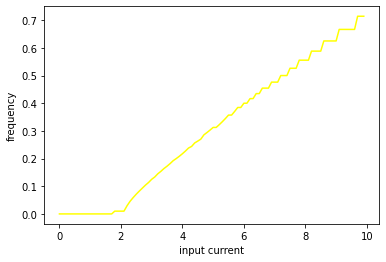

In [548]:
frequency3()